In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [107]:
data = pd.read_csv('Student_performance_data _.csv')

## Student Data Overview

### Student ID
- **StudentID**: A unique identifier assigned to each student, ranging from 1001 to 3392.

### Demographic Details
- **Age**: The age of the students, ranging from 15 to 18 years.
- **Gender**: Gender of the students, where:
  - `0` represents Male
  - `1` represents Female
- **Ethnicity**: The ethnicity of the students, coded as follows:
  - `0`: Caucasian
  - `1`: African American
  - `2`: Asian
  - `3`: Other
- **ParentalEducation**: The education level of the parents, coded as follows:
  - `0`: None
  - `1`: High School
  - `2`: Some College
  - `3`: Bachelor's
  - `4`: Higher

### Study Habits
- **StudyTimeWeekly**: Weekly study time in hours, ranging from 0 to 20.
- **Absences**: Number of absences during the school year, ranging from 0 to 30.
- **Tutoring**: Tutoring status, where:
  - `0` indicates No
  - `1` indicates Yes

### Parental Involvement
- **ParentalSupport**: The level of parental support, coded as follows:
  - `0`: None
  - `1`: Low
  - `2`: Moderate
  - `3`: High
  - `4`: Very High

### Extracurricular Activities
- **Extracurricular**: Participation in extracurricular activities, where:
  - `0` indicates No
  - `1` indicates Yes
- **Sports**: Participation in sports, where:
  - `0` indicates No
  - `1` indicates Yes
- **Music**: Participation in music activities, where:
  - `0` indicates No
  - `1` indicates Yes
- **Volunteering**: Participation in volunteering, where:
  - `0` indicates No
  - `1` indicates Yes

### Academic Performance
- **GPA**: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

### Target Variable: Grade Class
- **GradeClass**: Classification of students' grades based on GPA:
  - `0`: 'A' (GPA >= 3.5)
  - `1`: 'B' (3.0 <= GPA < 3.5)
  - `2`: 'C' (2.5 <= GPA < 3.0)
  - `3`: 'D' (2.0 <= GPA < 2.5)
  - `4`: 'F' (GPA < 2.0)


In [5]:
data.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


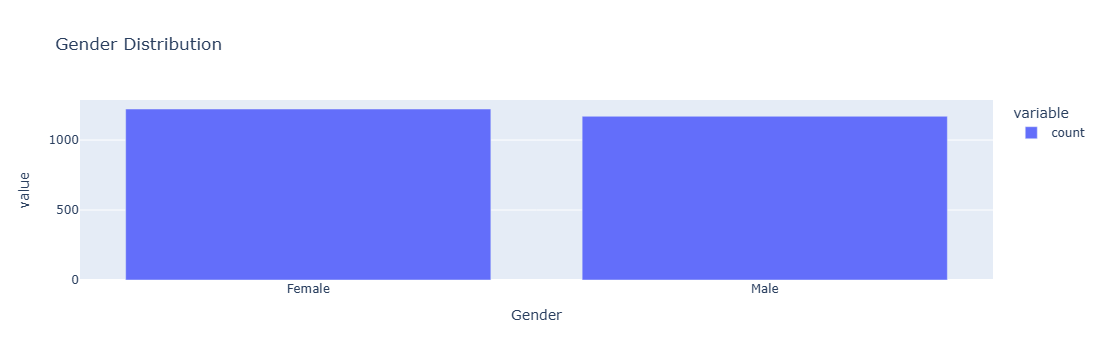

In [47]:
## 0 --- male 
## 1 --- female
gender_labels = {0: 'Male', 1: 'Female'}
count = data['Gender'].value_counts().rename(index=gender_labels)
fig = px.bar(count, title='Gender Distribution')
fig.show()

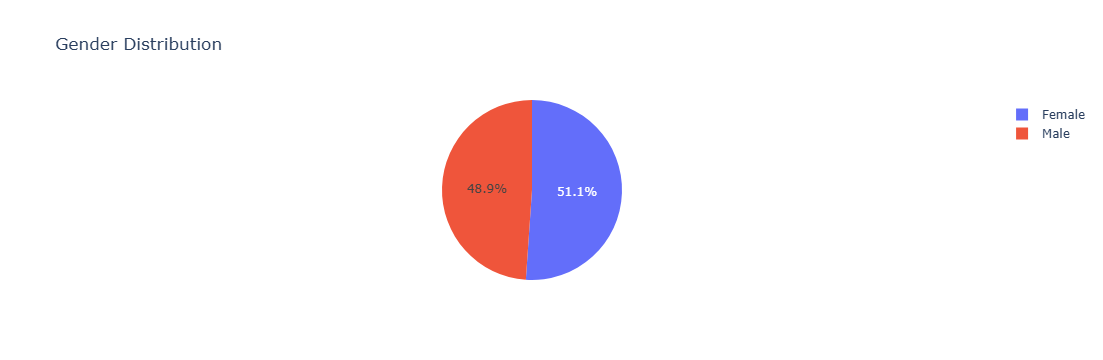

In [56]:
df = count.reset_index()
fig = px.pie(df, names='Gender', values='count', title='Gender Distribution')
fig.show()

In [57]:
data['Gender'].isnull().sum()

np.int64(0)

### Conclusion

- The gender distribution within the dataset is nearly even, with **51.1%** Female and **48.9%** Male participants. 
- **no missing values** in the 'Gender' column.


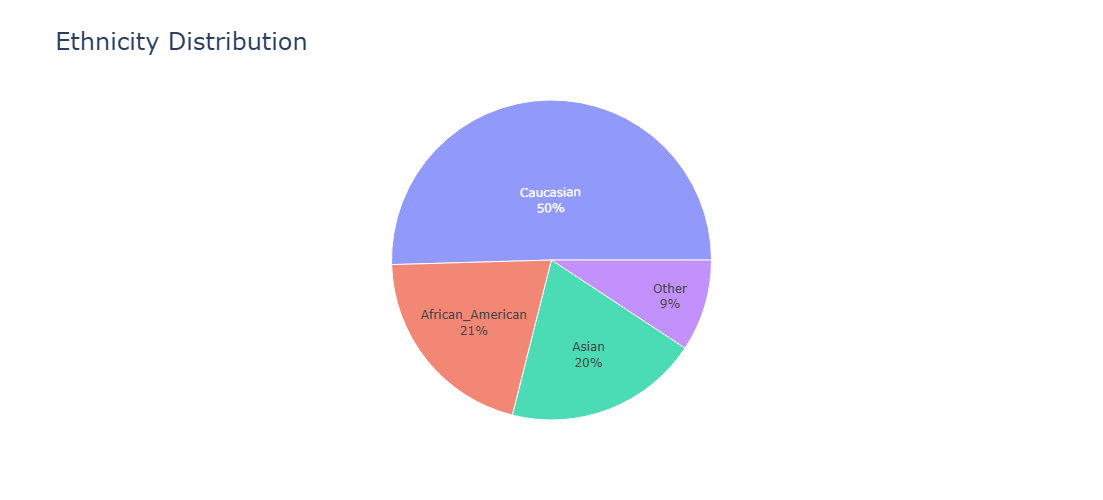

In [79]:
# Ethnicity: The ethnicity of the students, coded as follows:
# 0: Caucasian
# 1: African American
# 2: Asian
# 3: Other
Ethnicity_labels = {0:'Caucasian',1:'African_American',2:'Asian',3:'Other'}
df = data['Ethnicity'].value_counts().rename(index=Ethnicity_labels).reset_index()
fig = px.sunburst(df,path=['Ethnicity'],values='count',title='Ethnicity Distribution')
fig.update_layout(
    width=800,
    height = 500,
    title_font=dict(size=24)
)
fig.update_traces(textinfo="label+percent entry")
fig.show()

In [74]:
data['Ethnicity'].isnull().sum()

np.int64(0)

### Conclusion

-Caucasians **(50%)**, African Americans **(21%)**, Asians **(20%)**, and others **(9%)**. The dataset has no missing values in the 'Ethnicity' column. 

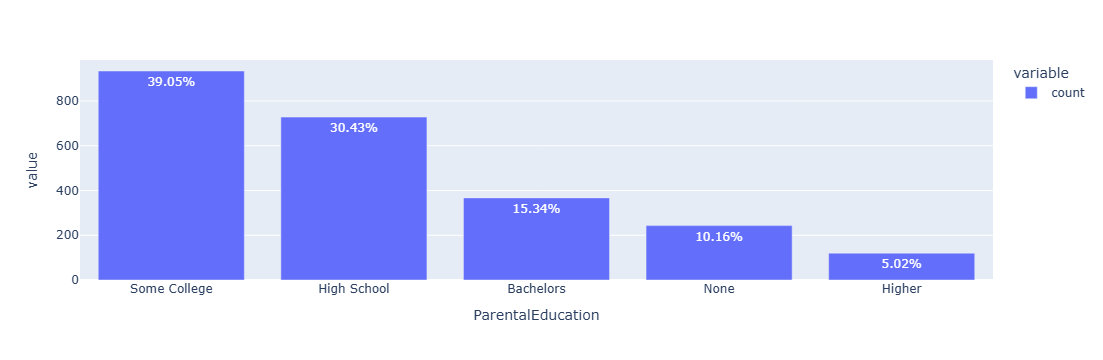

In [94]:
# ParentalEducation: The education level of the parents, coded as follows:
# 0: None
# 1: High School
# 2: Some College
# 3: Bachelor's
# 4: Higher
ParentalEducation_labels = {0: 'None',1: 'High School',2: 'Some College',3: 'Bachelors',4: 'Higher'}
df = data['ParentalEducation'].value_counts().rename(index=ParentalEducation_labels)
df_percent = (df / df.sum()) * 100
fig = px.bar(df,text=df_percent.apply(lambda x: f'{x:.2f}%'))
fig.update_traces(texttemplate='%{text}', textposition='auto')
fig.show()

### conclusion
-The dataset is **skewed** towards individuals whose parents have attained **some level** of college education.

mean is 9.77
median is 9.71


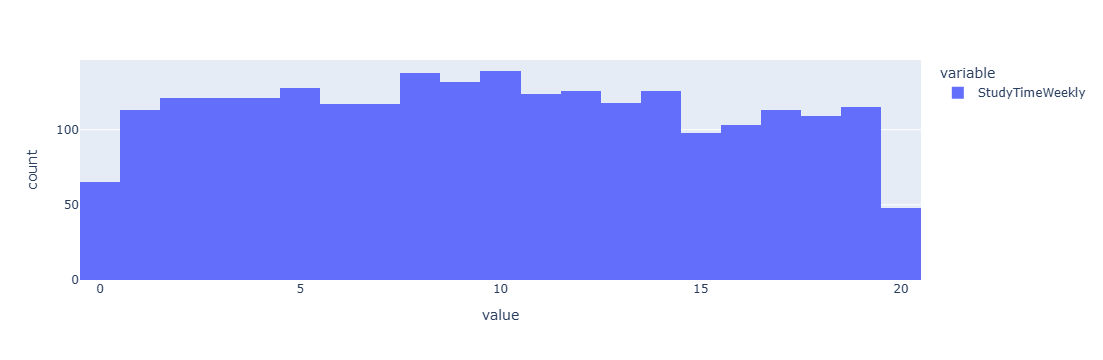

In [104]:
#StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
mean = data['StudyTimeWeekly'].mean()
median = data['StudyTimeWeekly'].median()
mode = data['StudyTimeWeekly'].mode()
print('mean is',round(mean,2))
print('median is',round(median,2))
px.histogram(data['StudyTimeWeekly'])

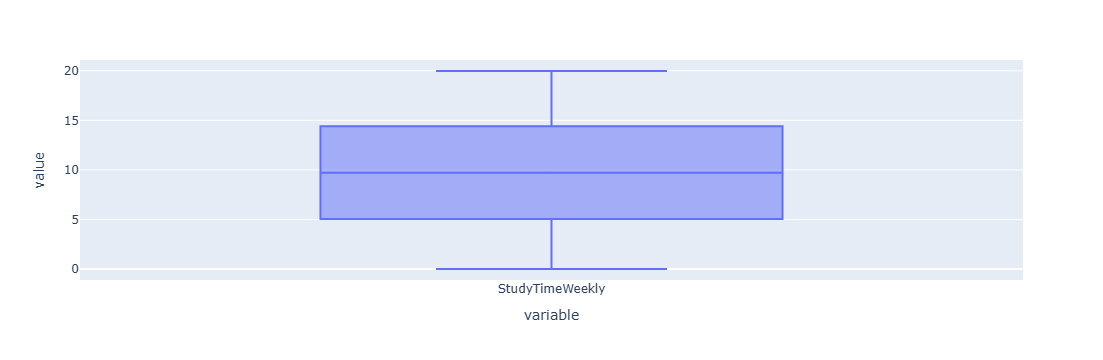

In [105]:
px.box(data['StudyTimeWeekly'])

### Conclusion

- The mean and median values are close to each other, at approximately **9.77** and **9.71** hours.
- most students spend between **5** and **15** hours per week studying,

In [9]:
# Absences: Number of absences during the school year, ranging from 0 to 30.
print(data['Absences'].mean())
print(data['Absences'].mode())

14.54138795986622
0    13
1    25
Name: Absences, dtype: int64


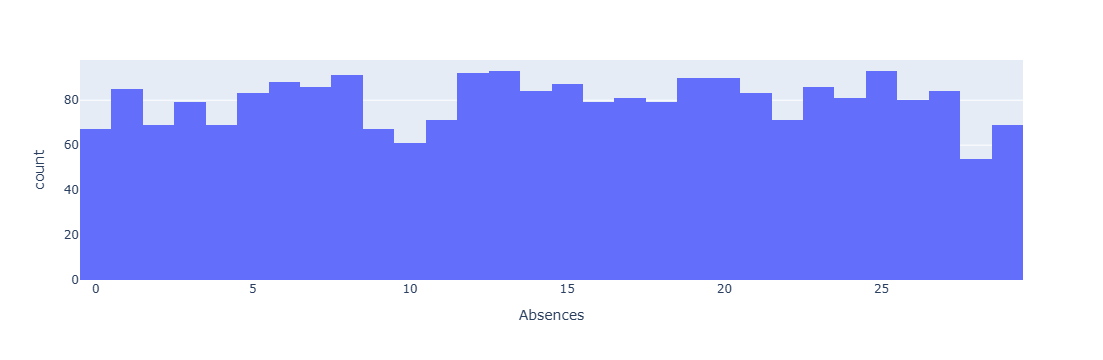

In [22]:
px.histogram(data['Absences'],x='Absences')

### Conclusion

- The mode of the data is **13** and **25**
- The data appears to be **relatively** **uniform**, 

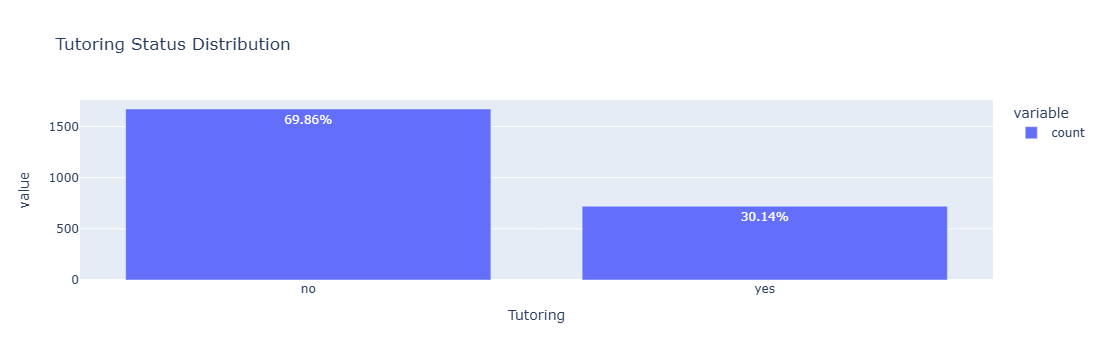

In [47]:
# Tutoring: Tutoring status, where:
# 0 indicates No
# 1 indicates Yes
tut = data['Tutoring'].value_counts()
di = {0: 'no', 1: 'yes'}
tut = tut.rename(index=di)
tut_percent = (tut/sum(tut))*100

fig = px.bar(tut,text=tut_percent.apply(lambda x: f'{x:.2f}%'), title='Tutoring Status Distribution')
fig.update_traces(texttemplate='%{text}', textposition='auto')

### Conclusion

- majority of students in the dataset are not participating in tutoring
- **69.86%** of students do not receive tutoring **(no)**, while about **30.14%** of students do receive tutoring **(yes)**.

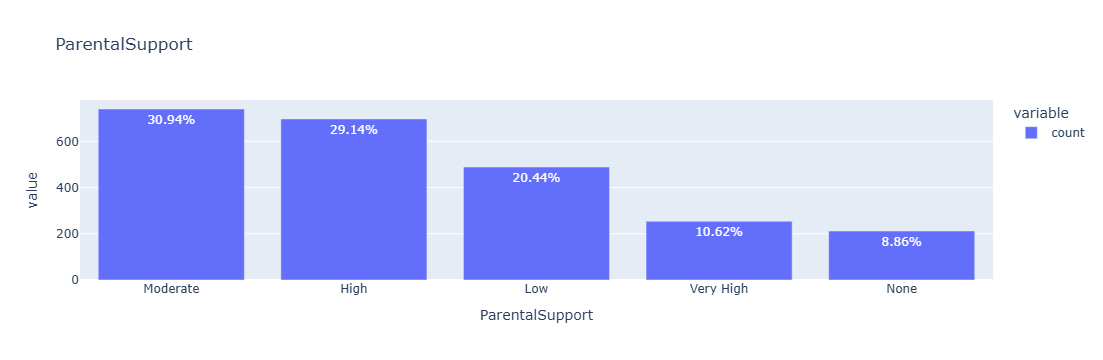

In [200]:
# ParentalSupport: The level of parental support, coded as follows:
# 0: None
# 1: Low
# 2: Moderate
# 3: High
# 4: Very High
ParentalSupport = data['ParentalSupport'].value_counts()
di = {0:'None',1:'Low',2:'Moderate',3:'High',4:'Very High'}
ParentalSupport = ParentalSupport.rename(index=di)
ParentalSupport_percent = round((ParentalSupport/sum(ParentalSupport))*100,2)
fig = px.bar(ParentalSupport,text=ParentalSupport_percent,title='ParentalSupport')
fig.update_traces(texttemplate='%{text}%')

### Conclusion

-  **"Moderate"** and **"High"** being the most common Parental support accounting for 30% and 29% respectively.

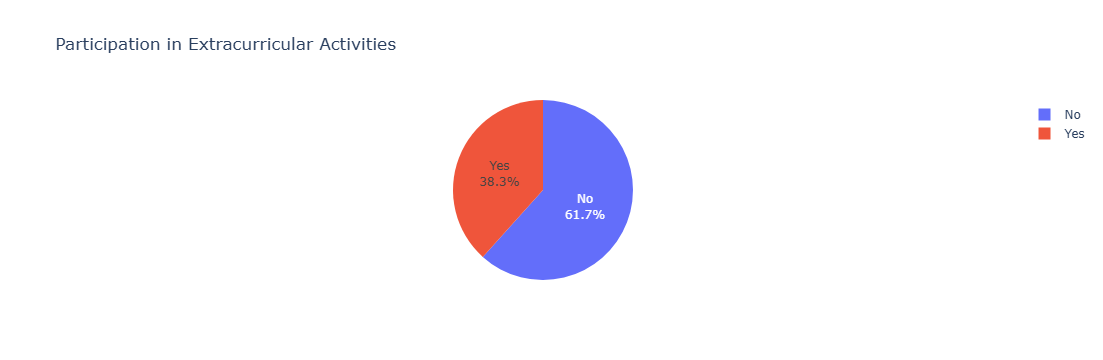

In [44]:
# Extracurricular: Participation in extracurricular activities, where:
# 0 indicates No
# 1 indicates Yes
Extracurricular = data['Extracurricular'].value_counts()
di = {0:'No',1:'Yes'}
Extracurricular = Extracurricular.rename(index=di)
fig = px.pie(Extracurricular,names=Extracurricular.index,values=Extracurricular.values,title='Participation in Extracurricular Activities')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

### Conclusion

 -  **61.7%**, do not participate in extracurricular activities, while **38.3%** of the students are involved in extracurricular activities.

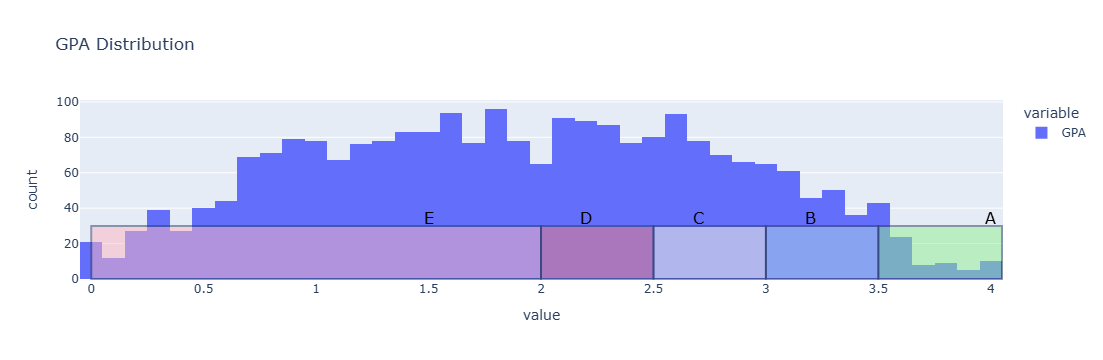

In [211]:
fig = px.histogram(data['GPA'],title='GPA Distribution')
fig.add_shape(type='rect',x0=3.5,x1=4.05,y0=0,y1=30,fillcolor="lightgreen",opacity=0.5)
fig.add_shape(type='rect',x0=3,x1=3.5,y0=0,y1=30,fillcolor='lightblue',opacity=0.5)
fig.add_shape(type='rect',x0=2.5,x1=3,y0=0,y1=30,fillcolor='lightyellow',opacity=0.5)
fig.add_shape(type='rect',x0=2,x1=2.5,y0=0,y1=30,fillcolor='lightcoral',opacity=0.5)
fig.add_shape(type='rect',x0=0,x1=2,y0=0,y1=30,fillcolor='lightpink',opacity=0.5)

fig.add_annotation(x=1.5, y=35, text="E",font=dict(size=16, color="black"),showarrow=False)
fig.add_annotation(x=2.2,y=35,text="D",font=dict(size=16,color="black"),showarrow=False)
fig.add_annotation(x=2.7,y=35,text="C",font=dict(size=16,color="black"),showarrow=False)
fig.add_annotation(x=3.2,y=35,text="B",font=dict(size=16,color="black"),showarrow=False)
fig.add_annotation(x=4,y=35,text="A",font=dict(size=16,color="black"),showarrow=False)


### Conclusion
- The distribution is somewhat Normal , many students falling into the **"C" , "D" , "E"** ranges.

- numerical columns - Age,StudyTimeWeekly,Absences,GPA
-  categorical columns - Ethnicity,ParentalEducation,Gender,Tutoring,ParentalSupport,Extracurricular

In [110]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


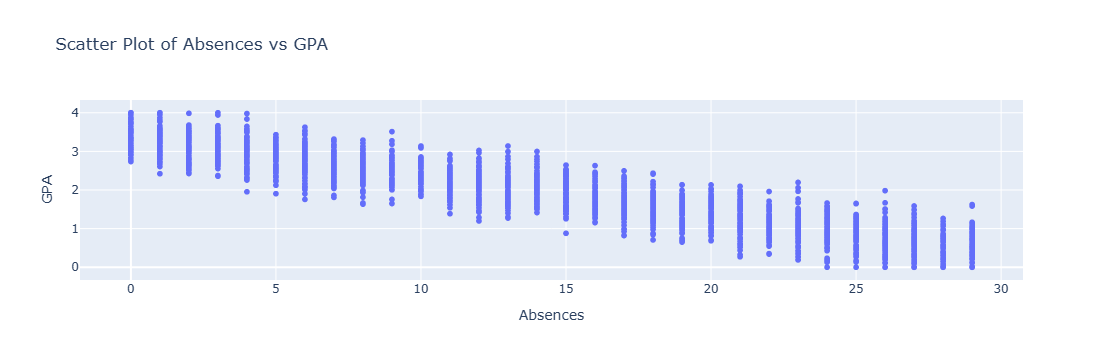

In [111]:
fig = px.scatter(data, x='Absences', y='GPA', title='Scatter Plot of Absences vs GPA')
fig.show()

### Conclusion
- Negative Correlation
- High GPA with Low Absences
- low GPA with High Absences

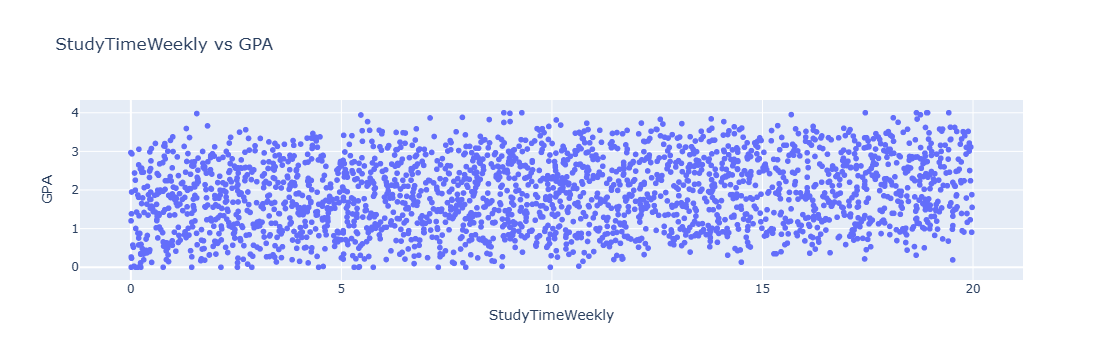

In [113]:
fig = px.scatter(data,x='StudyTimeWeekly',y='GPA',title='StudyTimeWeekly vs GPA')
fig.show()

### Conclusion

- plot suggests that study time alone does not have a straightforward or strong influence on GPA

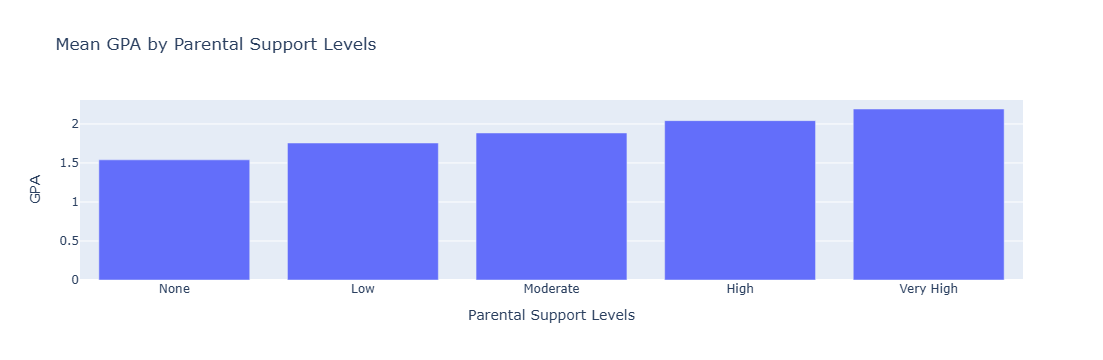

In [132]:
df = data.groupby('ParentalSupport')['GPA'].mean().reset_index()
di = {0:'None',1:'Low',2:'Moderate',3:'High',4:'Very High'}
df['ParentalSupport'] = df['ParentalSupport'].apply(lambda x:di[x])
fig = px.bar(df,x='ParentalSupport',y='GPA', title='Mean GPA by Parental Support Levels')
fig.update_layout(xaxis_title='Parental Support Levels', yaxis_title='GPA')

### Conclusion

- The data suggests that parental support plays a crucial role in students' academic success. The more supportive the parents are, the higher the students' GPAs tend to be.

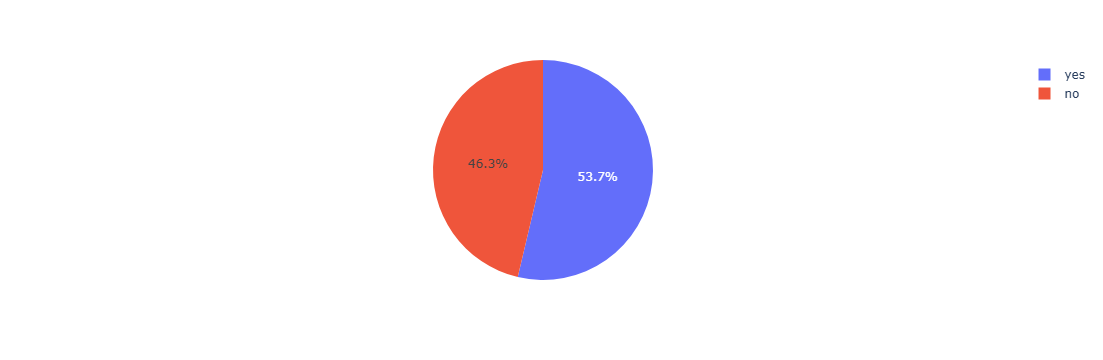

In [140]:
df = data.groupby('Tutoring')['GPA'].mean().reset_index()
di = {0: 'no', 1: 'yes'}
df['Tutoring'] = df['Tutoring'].apply(lambda x:di[x])
px.pie(df,names=df['Tutoring'],values=df['GPA'])

### Conclusion

- The chart shows that 53.7% of the students who receive tutoring have a higher mean GPA of 2.10.
- 46.3% of the students who do not receive tutoring have a lower mean GPA of 1.8.

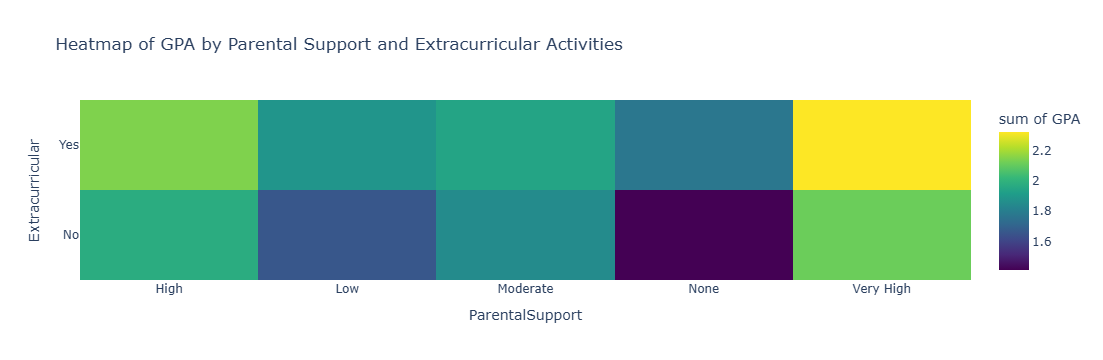

In [156]:
import plotly.express as px

heatmap_data = data.groupby(['ParentalSupport', 'Extracurricular'])['GPA'].mean().reset_index()
px.density_heatmap(heatmap_data,x='ParentalSupport',y='Extracurricular',z='GPA'
                  , color_continuous_scale='Viridis',title='Heatmap of GPA by Parental Support and Extracurricular Activities')

### Conclusion

- Higher levels of parental support, especially when combined with extracurricular participation, are associated with higher GPAs. Conversely, the absence of support and lack of involvement in extracurricular activities tend to correlate with lower academic achievement.

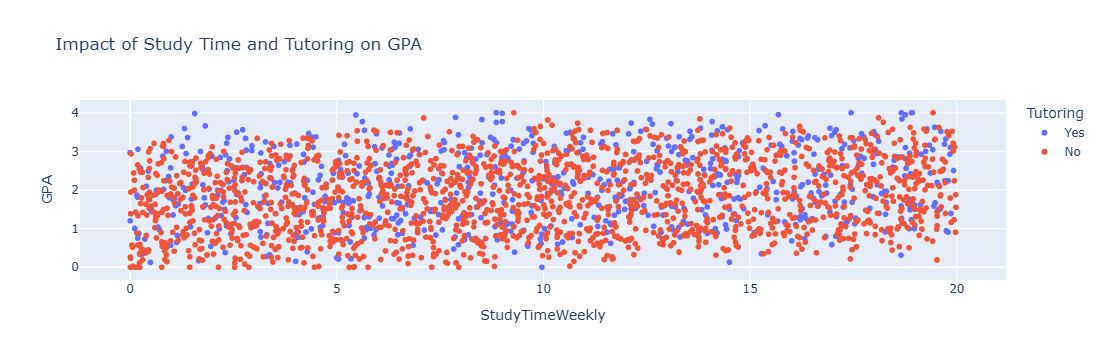

In [161]:
# Study Time, Tutoring, and GPA:
tutor_labels = {0:'No',1:'Yes'}
data['Tutoring'] = data['Tutoring'].apply(lambda x:tutor_labels[x])
fig = px.scatter(data,x='StudyTimeWeekly',y='GPA',color='Tutoring',
                title='Impact of Study Time and Tutoring on GPA',
                )
fig.show()

### Conclusion

- No relationship among these three columns

In [ ]:
# Gender, Ethnicity, and GPA:
Ethnicity_labels = {0:'Caucasian',1:'African_American',2:'Asian',3:'Other'}
data['Ethnicity'] = data['Ethnicity'].apply(lambda x:Ethnicity_labels[x])
Gender_labels = {0: 'Female', 1: 'Male'}
data['Gender'] = data['Gender'].apply(lambda x: Gender_labels[x])

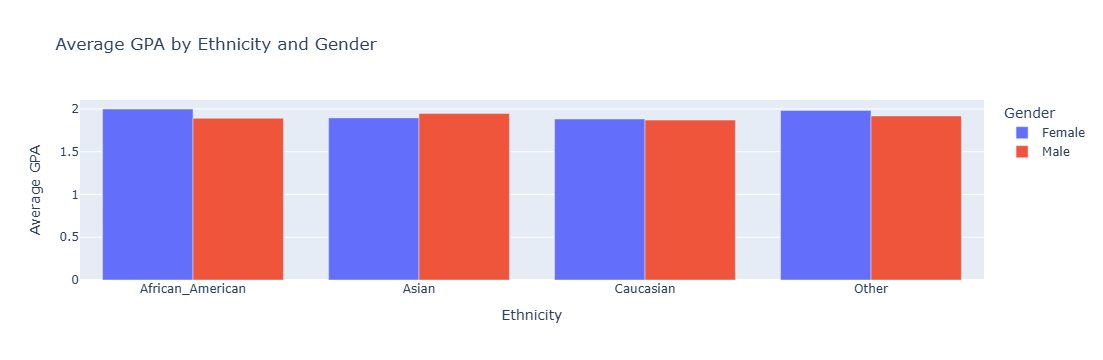

In [171]:
grouped_data = data.groupby(['Ethnicity', 'Gender'])['GPA'].mean().reset_index()
fig = px.bar(grouped_data, x='Ethnicity', y='GPA', color='Gender', barmode='group',
             title='Average GPA by Ethnicity and Gender',
             labels={'Ethnicity': 'Ethnicity', 'GPA': 'Average GPA', 'Gender': 'Gender'})

fig.show()


### Conclusion

- Gender appears to have a small impact on GPA, with female students often performing slightly better than male students within the same ethnic group.

In [ ]:
# Parental Education, Parental Support, and GPA:
ParentalEducation_labels = {0: 'None',1: 'High School',2: 'Some College',3: 'Bachelors',4: 'Higher'}
data['ParentalEducation'] = data['ParentalEducation'].apply(lambda x:ParentalEducation_labels[x])

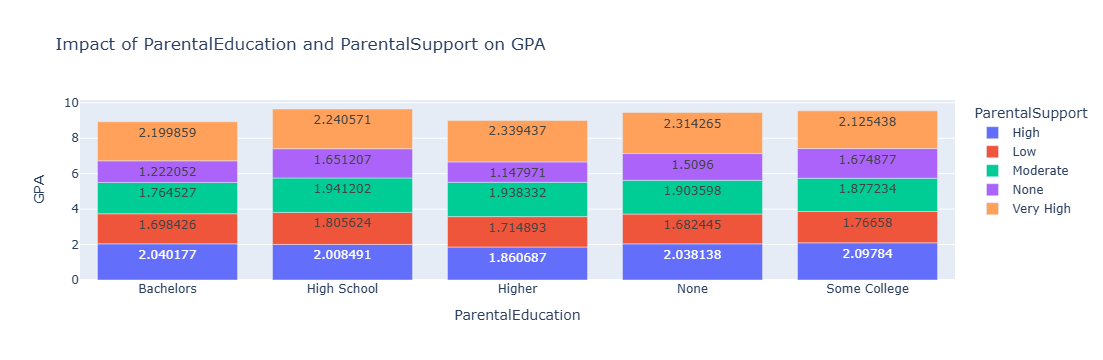

In [185]:
aggre_data = data.groupby(['ParentalEducation', 'ParentalSupport'])['GPA'].mean().reset_index()
fig = px.bar(aggre_data,x='ParentalEducation',y='GPA',color='ParentalSupport',title='Impact of ParentalEducation and ParentalSupport on GPA',text_auto=True)
fig.show()

### Conclusion

- "Very High" parental support consistently results in higher GPAs, regardless of the parents' education level.
- While parental education does not have major influence on GPA.

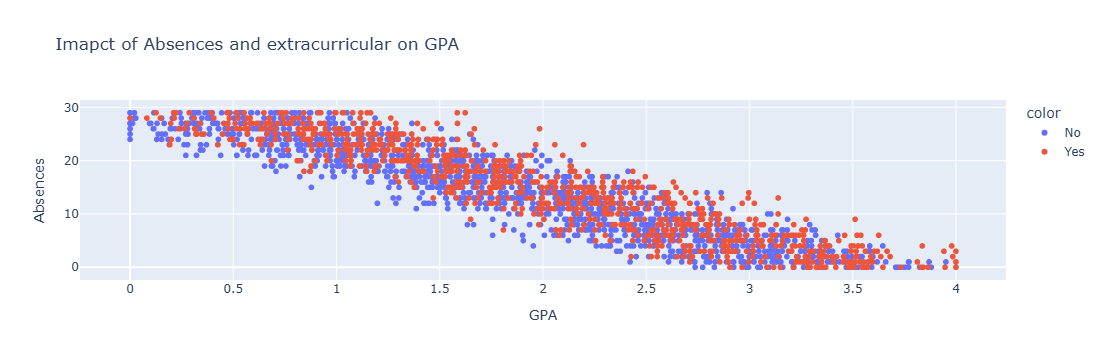

In [189]:
# Extracurricular Activities, Absences, and GPA:
fig = px.scatter(x=data['GPA'],y=data['Absences'],title='Imapct of Absences and extracurricular on GPA ',
                labels={'x':'GPA','y':'Absences'},color=data['Extracurricular'])
fig.show()

### Conclusion

- the data here suggests that the number of absences plays a more critical role in determining GPA. The consistent negative correlation between absences and GPA, regardless of extracurricular involvement.

# Summary Report: Key Findings from Student Data Analysis

---

**1. Absences and Student Performance:**
- **Observation:** Absences significantly impact student performance. The fewer the absences, the higher the GPA tends to be.
- **Conclusion:** Reducing absences is critical for academic success.


---

**2. Study Time and GPA:**
- **Observation:** Simply increasing study time may not directly lead to better grades.
- **Conclusion:** Study time alone does not show a strong correlation with GPA.


---

**3. Tutoring Impact:**
- **Observation:** Tutoring is beneficial, though its impact is moderate.
- **Conclusion:** Students who receive tutoring have slightly higher GPAs on average.


---

**4. Parental Support and Extracurricular Activities:**
- **Observation:** A balanced involvement in both parental support and extracurricular activities contributes positively to academic performance.
- **Conclusion:** Higher levels of parental support, combined with extracurricular participation, lead to higher GPAs.


---

**5. Gender and GPA:**
- **Observation:** While gender has a minor influence, it is not a major predictor of GPA.
- **Conclusion:** Female students tend to perform slightly better than male students across different ethnicities, but the impact is minimal.


---

**6. Parental Support vs. Parental Education:**
- **Observation:** Parental support is more crucial than parental education level in influencing student performance.
- **Conclusion:** Regardless of parental education, high parental support consistently results in better GPAs.


---

**7. Absences and Extracurricular Activities:**
- **Observation:** Reducing absences is critical for academic success, even if students are involved in extracurriculars.
- **Conclusion:** High absences are strongly associated with lower GPAs, regardless of participation in extracurricular activities.


---

### Recommended Features for Predicting Grade Class:
Based on the analysis, the following columns are most useful in predicting students' Grade Class:

- **Absences**
- **Parental Support**
- **Tutoring**
- **Extracurricular Activities**
- **Parental Education**

These factors have shown the strongest correlations with student GPA and are critical for forecasting academic performance.
